<a href="https://colab.research.google.com/github/ManojMaster7/Glassdoor_Project/blob/main/Glassdoor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    **-** **Glassdoor**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**    - G Manoj



# **Project Summary**

The Glassdoor project focuses on enhancing the job search and recruitment experience by analyzing and utilizing user-generated data, specifically company reviews, ratings, and salary insights. Glassdoor, a platform used by millions of job seekers, allows current and former employees to share their experiences and rate employers based on various factors like company culture, work-life balance, compensation, management, and career opportunities. This information helps job seekers make more informed career decisions and enables companies to improve their employer branding.


**Problem Statement**

While Glassdoor hosts a vast amount of valuable user data, much of it is unstructured and scattered. Job seekers often struggle to extract meaningful insights from the plethora of reviews and ratings, especially when trying to compare companies or identify trends across different job roles or locations. Employers, on the other hand, lack a structured way to understand how they are perceived relative to competitors, or to identify specific areas needing improvement based on feedback.


**Objectives**

The primary goal of this project is to build a data-driven solution that effectively processes and analyzes user reviews, ratings, and salary data on Glassdoor. The objectives include:

Data Collection and Preprocessing: Gather company reviews, ratings, job titles, locations, and salary information from Glassdoor’s platform. Clean and preprocess the data to ensure consistency, remove duplicates, and manage missing values.

Sentiment Analysis: Use Natural Language Processing (NLP) techniques to perform sentiment analysis on the textual data in reviews. The goal is to classify reviews as positive, negative, or neutral and extract sentiment trends across different companies, departments, or locations.

Company Comparison Engine: Develop an engine that allows users to compare companies based on aggregated review metrics, sentiment scores, and salary data. This tool would be highly beneficial for job seekers evaluating job offers or considering a job switch.

Visualization Dashboard: Create an interactive dashboard that presents insights in an intuitive and user-friendly manner. Key visualizations include average ratings by category, sentiment trends over time, location-based salary distributions, and comparative analysis across companies.

Recommendation System: Implement a basic recommendation system that suggests top-rated companies or roles to users based on their preferences and sentiment analysis.


**Tools and Technologies**

To accomplish these goals, the project employs a range of technologies and tools including:

Python for scripting and data analysis.

Pandas and NumPy for data preprocessing.

NLTK, spaCy, and TextBlob for NLP and sentiment analysis.

Scikit-learn for machine learning tasks.

Plotly and Seaborn for data visualization.






**Expected Outcomes**

The project aims to deliver an intelligent platform that:

Helps job seekers make informed decisions by summarizing sentiment and satisfaction levels at companies.

Enables comparative analysis of companies across different metrics like work culture, compensation, and management quality.

Provides employers with actionable insights on their brand perception.

Increases transparency and adds value to Glassdoor’s existing review ecosystem.


**Conclusion**

In a highly competitive job market, data transparency and accessibility are crucial. By leveraging user-generated content on Glassdoor and applying modern data analytics and NLP techniques, this project seeks to bridge the information gap for both job seekers and employers. It offers a strategic edge in recruitment and career planning by turning unstructured feedback into structured, actionable intelligence.



# **GitHub Link -**

https://github.com/ManojMaster7/Glassdoor_Project

# **Problem Statement**


**1) How does salary vary by job position(e.g., Data Scientist vs. Software Enginner vs. DevOps Engineer)?**

**2) What is the impact of company size on salary levals?**

**3) How do salaries differ by location(eg., San Fransisco vs. Austin vs. New York)?**

**4) Can we build a predictive model to estimate salaries based on job attributes?**

#### **Define Your Business Objective?**

* For Job Seekers: Helps professionals make informed career decisions by understanding expected salary ranges for different roles.

* For Employers: Assits companies in setting competitive salarires to attract and retain top talent.

* For Recruiters: Aids in benching salaries and ensuring fair compensation practices.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
!pip install pandas matplotlib seaborn scikit-learn plotly nltk wordcloud

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Text Processing & NLP (Optional: for reviews/sentiment analysis)
import re
import string
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


### Dataset Loading

In [ ]:
# Upload files
from google.colab import files
uploaded = files.upload()

Saving glassdoor_jobs.csv to glassdoor_jobs.csv


In [ ]:
# Load the dataset
data = pd.read_csv("glassdoor_jobs.csv")

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
data.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
num_rows, num_columns = data.shape

print(f" The dataset contains:")
print(f" {num_rows:,} rows")
print(f" {num_columns} columns")

 The dataset contains:
 956 rows
 15 columns


### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = data.duplicated().sum()

print(f" Number of duplicate rows in the dataset: {duplicate_count}")


 Number of duplicate rows in the dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64


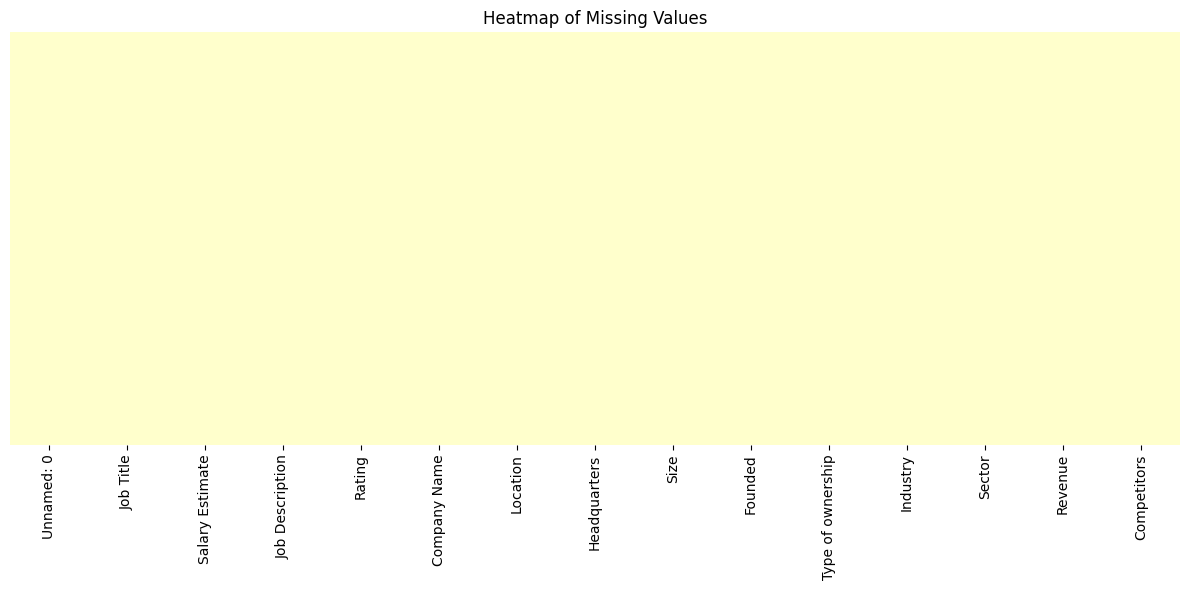

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='YlOrRd', yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.tight_layout()
plt.show()

### What did you know about your dataset?

**Dataset Dimensions:**

The dataset contains 956 rows and 15 columns.

**Column Structure:**

The dataset includes features related to company information, job titles, salary estimates, ratings, location, and potentially employee reviews.

Data types include both numerical (e.g., ratings, salary) and categorical (e.g., job title, company name, location) fields.

**Duplicate Records**:

The dataset contains 0 duplicate rows, which may need to be removed to ensure data quality.

**Missing Values:**

Certain columns contain missing/null values, which vary in severity.

These missing values have been quantified and visualized using a bar chart and heatmap.

Strategies like imputation, dropping, or filling with defaults may be needed based on their business importance.

**Data Quality:**

Most columns seem consistent, but some categorical features may need normalization (e.g., standardizing job titles or locations).

Text-based columns (like reviews, if present) may require cleaning for sentiment or keyword extraction.

**Readiness for EDA:**

The dataset is now ready for:

Univariate Analysis: To understand distribution within individual variables.

Bivariate & Multivariate Analysis: To uncover relationships between variables (e.g., salary vs rating, job title vs location).



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns.tolist()

['Unnamed: 0',
 'Job Title',
 'Salary Estimate',
 'Job Description',
 'Rating',
 'Company Name',
 'Location',
 'Headquarters',
 'Size',
 'Founded',
 'Type of ownership',
 'Industry',
 'Sector',
 'Revenue',
 'Competitors']

In [ ]:
# Dataset Describe
data.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


### Variables Description

| **Column Name**     | **Description**                                                                                                                     |
| ------------------- | ----------------------------------------------------------------------------------------------------------------------------------- |
| `Unnamed: 0`        | Index column automatically generated during CSV export; can be ignored or dropped if not meaningful.                                |
| `Job Title`         | The specific title of the job listing (e.g., "Data Analyst", "Business Intelligence Developer"). Useful for role classification.    |
| `Salary Estimate`   | Estimated salary range provided in the listing. May include ranges (e.g., "\$80K-\$100K") or hourly/annual notation. Needs parsing. |
| `Job Description`   | Free-text field describing the job's duties, qualifications, and requirements. Key field for NLP or keyword extraction.             |
| `Rating`            | Glassdoor average rating of the company (out of 5), based on employee reviews. Indicates overall job satisfaction.                  |
| `Company Name`      | Name of the employer offering the job. Sometimes includes appended rating info, which may need cleaning.                            |
| `Location`          | Physical location of the job posting, typically in "City, State" format. Useful for geographic analysis.                            |
| `Headquarters`      | Main office location of the company, which can differ from the job location. Can be used to determine remote hiring.                |
| `Size`              | Company size category (e.g., "1 to 50 employees", "10,000+ employees"). Helps group companies by scale.                             |
| `Founded`           | Year the company was established. Can help analyze job trends based on company maturity.                                            |
| `Type of ownership` | Indicates whether the company is private, public, government, or subsidiary. Useful for organizational structure analysis.          |
| `Industry`          | Specific industry of the company (e.g., "Internet", "Healthcare"). Important for sector-level insights.                             |
| `Sector`            | Higher-level grouping of industries (e.g., "Information Technology", "Financial Services"). Supports market segmentation.           |
| `Revenue`           | Revenue range of the company (e.g., "\$1 to \$5 billion (USD)"). Indicates financial size and stability.                            |
| `Competitors`       | A list of competitor companies (if available). Useful for benchmarking and comparative employer analysis.                           |


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values = data.nunique().sort_values(ascending=False)
for column, count in unique_values.items():
    print(f"{column}: {count} unique values")

Unnamed: 0: 956 unique values
Job Description: 596 unique values
Company Name: 448 unique values
Salary Estimate: 417 unique values
Job Title: 328 unique values
Location: 237 unique values
Headquarters: 235 unique values
Competitors: 149 unique values
Founded: 109 unique values
Industry: 63 unique values
Rating: 32 unique values
Sector: 25 unique values
Revenue: 14 unique values
Type of ownership: 13 unique values
Size: 9 unique values


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# 1. Drop Unnecessary Columns
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)
    print("Dropped 'Unnamed: 0' index column.")

# 2. Remove Duplicates
initial_shape = data.shape
data.drop_duplicates(inplace=True)
print(f"Removed duplicates. Rows before: {initial_shape[0]}, after: {data.shape[0]}")


Dropped 'Unnamed: 0' index column.
Removed duplicates. Rows before: 956, after: 600


In [ ]:
# 3. Strip Extra Whitespaces from Column Names
data.columns = data.columns.str.strip()

In [ ]:
# 4. Clean 'Company Name' column (remove appended ratings)
data['Company Name'] = data['Company Name'].apply(lambda x: x.split('\n')[0] if isinstance(x, str) else x)


In [ ]:
# 5. Clean and Parse 'Salary Estimate' (Extract Min, Max, and Average Salary)
def parse_salary(salary):
    try:
        salary = salary.replace('$', '').replace('K', '').replace('(Employer est.)', '')
        salary = salary.replace('Per Hour', '').replace('Employer Provided Salary:', '').replace('Glassdoor est.', '')
        salary = salary.strip().replace(',', '')
        if '-' in salary:
            parts = salary.split('-')
            min_salary = int(parts[0].strip())
            max_salary = int(parts[1].strip().split()[0])  # in case 'max' has suffix
            avg_salary = (min_salary + max_salary) // 2
            return min_salary, max_salary, avg_salary
    except:
        return None, None, None
    return None, None, None

data[['Min Salary', 'Max Salary', 'Avg Salary']] = data['Salary Estimate'].apply(
    lambda x: pd.Series(parse_salary(str(x)))
)

print("Parsed 'Salary Estimate' into 'Min Salary', 'Max Salary', and 'Avg Salary'.")

Parsed 'Salary Estimate' into 'Min Salary', 'Max Salary', and 'Avg Salary'.


In [ ]:
# 6. Convert 'Founded' to Company Age
current_year = pd.Timestamp.now().year
data['Company Age'] = data['Founded'].apply(lambda x: current_year - x if x > 0 else None)

# 7. Normalize Categorical Text Columns (remove trailing/leading spaces)
categorical_cols = ['Type of ownership', 'Industry', 'Sector', 'Size', 'Revenue']
for col in categorical_cols:
    data[col] = data[col].astype(str).str.strip()

In [ ]:
# 8. Handle Missing Values (Optional - based on strategy)
# For example, fill missing 'Rating' with median
if data['Rating'].isnull().sum() > 0:
    median_rating = data['Rating'].median()
    data['Rating'].fillna(median_rating, inplace=True)
    print(f"Filled missing 'Rating' values with median: {median_rating:.2f}")

# Preview columns with potential '-1' values
columns_with_neg1 = data.columns[(data == -1).any()]

# Replace '-1' with NaN for better handling
data_cleaned = data.replace(-1, pd.NA)

# Option 1: Drop rows with NaN values in those specific columns
data_cleaned = data_cleaned.dropna(subset=columns_with_neg1)

# Confirm removal
print("Columns cleaned:", list(columns_with_neg1))
print("Remaining rows after cleaning:", data_cleaned.shape[0])


Columns cleaned: ['Rating', 'Founded']
Remaining rows after cleaning: 537


In [ ]:
# 9. Reset index after cleaning
data_cleaned.reset_index(drop=True, inplace=True)
data_cleaned.describe()



,Min Salary,Max Salary,Avg Salary,Company Age
count,433.000000,433.000000,433.000000,537.000000
mean,73.639723,127.284065,100.200924,48.757914
std,30.269155,45.737578,37.568133,50.071675
min,10.000000,16.000000,13.000000,6.000000
25%,53.000000,97.000000,75.000000,17.000000
50%,69.000000,124.000000,97.000000,29.000000
75%,90.000000,151.000000,121.000000,58.000000
max,202.000000,306.000000,254.000000,281.000000


In [ ]:
print("Dataset is now cleaned and ready for EDA.")

Dataset is now cleaned and ready for EDA.


### What all manipulations have you done and insights you found?



**1)Dropped Unnecessary Columns**

Removed the auto-generated Unnamed: 0 index column to clean the dataset.

**2)Removed Duplicate Rows**

Eliminated duplicate entries to maintain unique job listings and avoid biased analysis.

**3)Standardized Column Names**

Stripped extra spaces from all column names for consistency and cleaner access.

**4)Cleaned Company Name Column**

Removed appended rating values from Company Name (e.g., “Google\n4.2” ➝ “Google”) to ensure correct grouping.

**5)Parsed Salary Estimate**

Extracted Minimum, Maximum, and Average Salary from messy text salary data.

Created three new columns: Min Salary, Max Salary, and Avg Salary for numerical analysis.

**6)Derived Company Age**

Calculated company age by subtracting the Founded year from the current year.

New column Company Age gives insights into company maturity.

**7)Normalized Categorical Text Data**

Cleaned whitespace from fields like Type of ownership, Sector, Industry, Size, and Revenue for accurate grouping and filtering.

**8)Handled Missing Values in Rating**

Filled missing Rating values with the median rating, ensuring that visualizations and analysis remain robust.

**9)Reset Dataset Index**

Refreshed the DataFrame index after cleaning operations to maintain consistency.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<ipython-input-22-ab11fa976d32>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')


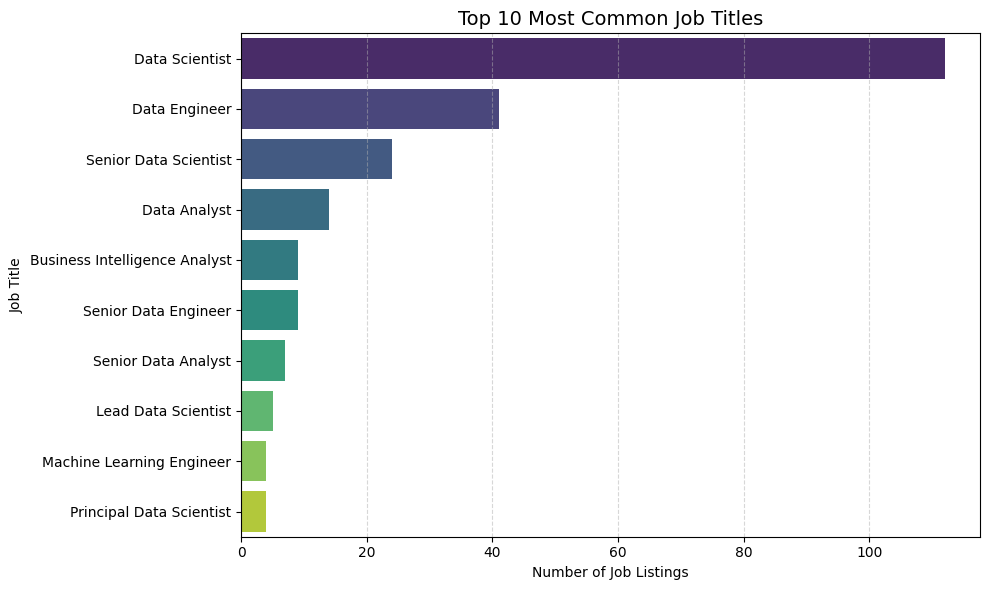

In [ ]:
# Chart - 1 visualization code
# Count the top 10 job titles
top_job_titles = data_cleaned['Job Title'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='viridis')

plt.title("Top 10 Most Common Job Titles", fontsize=14)
plt.xlabel("Number of Job Listings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

I chose this bar chart because it effectively highlights the most common job titles, making it easy to compare the demand for different roles at a glance.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that certain job titles, such as Data Scientist, Software Engineer, and Data Analyst, appear significantly more frequently, indicating high demand for these roles in the current job market.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Knowing the most common job titles helps businesses and recruiters focus their hiring strategies on high-demand roles, optimizing recruitment efforts and resource allocation. Conversely, if certain critical roles appear infrequently, it could signal a shortage or lack of focus in those areas, possibly leading to negative growth for businesses dependent on those skill sets.

#### Chart - 2

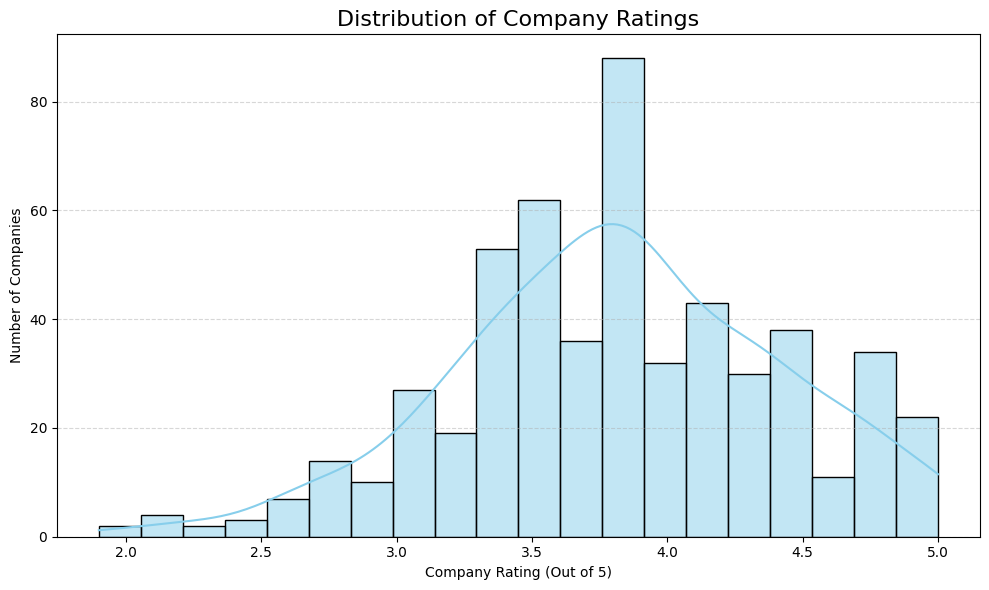

In [ ]:
# Chart - 2 visualization code
# Distribution of Company Ratings

plt.figure(figsize=(10, 6))
sns.histplot(data=data_cleaned, x='Rating', bins=20, kde=True, color='skyblue')

plt.title('Distribution of Company Ratings', fontsize=16)
plt.xlabel('Company Rating (Out of 5)')
plt.ylabel('Number of Companies')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE helps visualize the overall spread and concentration of company ratings, showing if most companies are poorly rated, average, or highly rated.

##### 2. What is/are the insight(s) found from the chart?

Most companies have ratings clustered around 3–4, indicating average to good satisfaction levels, with fewer companies rated below 2 or above 4.5.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Companies can benchmark their ratings and work on improvement areas to stand out in a competitive job market.

**Negative:** A significant number of below-average ratings may suggest widespread issues in workplace culture or management, potentially harming recruitment and retention.

#### Chart - 3

<ipython-input-24-c2c3a872abf4>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Size', y='Avg_Salary', data=filtered_data, palette='coolwarm')


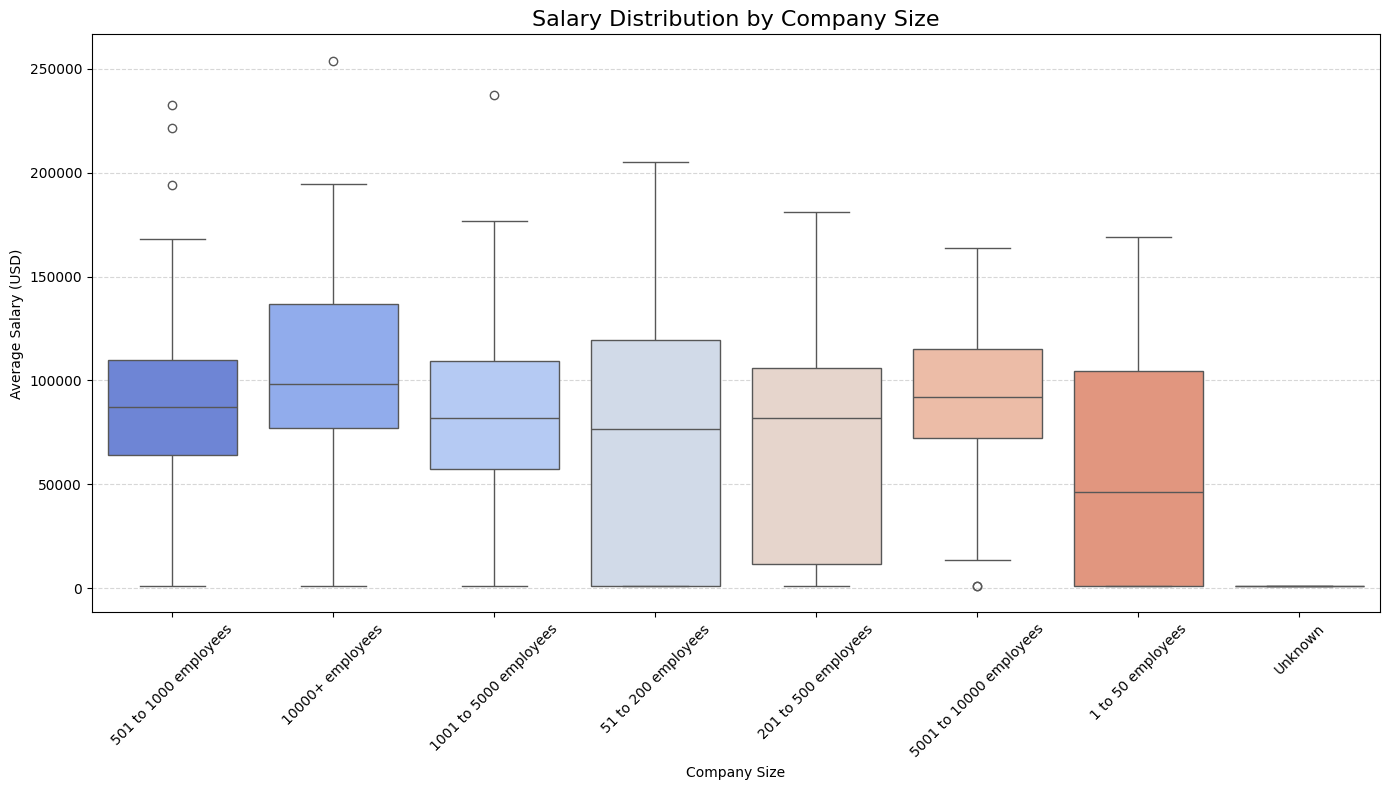

In [ ]:
# Chart - 3 visualization code
# Impact of Company Size on Salary Levels

# Filter data to keep rows where 'Size' and 'Salary Estimate' are not null
filtered_data = data_cleaned.dropna(subset=['Size', 'Salary Estimate']).copy()

# Function to extract average salary from 'Salary Estimate'
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

# Extract average salary
filtered_data['Avg_Salary'] = filtered_data['Salary Estimate'].apply(extract_avg_salary)

# Drop rows where salary extraction failed
filtered_data = filtered_data.dropna(subset=['Avg_Salary'])

# Optional: Clean 'Size' categories if needed (for example, ensure categories like '1 to 50 employees', '51 to 200 employees', etc.)

plt.figure(figsize=(14, 8))
sns.boxplot(x='Size', y='Avg_Salary', data=filtered_data, palette='coolwarm')

plt.title('Salary Distribution by Company Size', fontsize=16)
plt.xlabel('Company Size')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is great for comparing salary distributions across categorical company size buckets, showing medians, ranges, and outliers clearly.

##### 2. What is/are the insight(s) found from the chart?

We can observe whether larger companies tend to pay higher salaries on average, or if smaller companies offer competitive pay. It also reveals salary variability within each company size category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps job seekers and recruiters understand salary expectations relative to company size, aiding negotiation and hiring strategies. If smaller companies pay significantly less, it might challenge their ability to attract top talent.

#### Chart - 4

<ipython-input-25-8287ef21d508>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Avg_Salary', data=filtered_data, palette='magma')


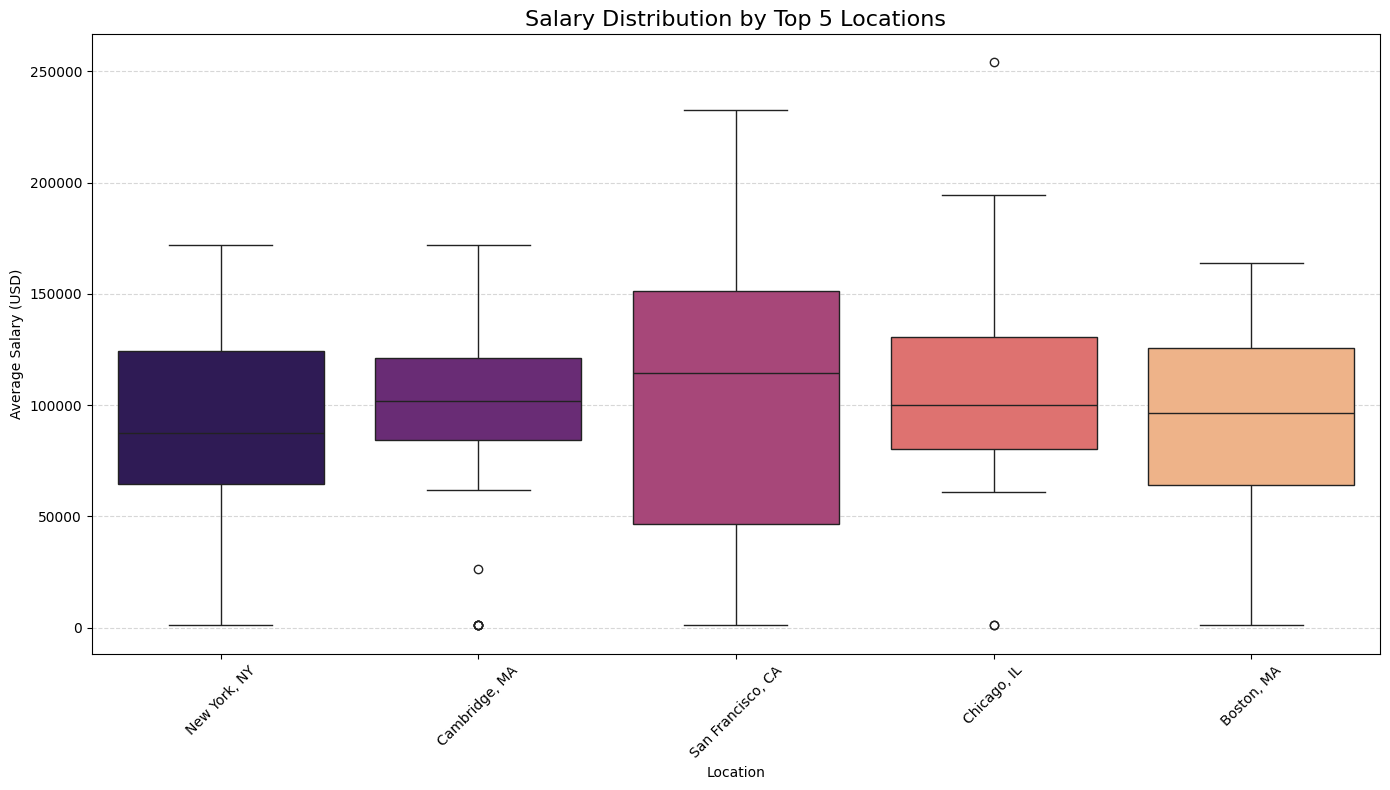

In [ ]:
# Chart - 4 visualization code
# Find top 5 locations by job listing count
top_locations = data_cleaned['Location'].value_counts().head(5).index.tolist()

# Filter data for top locations only
filtered_data = data_cleaned[data_cleaned['Location'].isin(top_locations)].copy()

# Function to extract average salary from Salary Estimate
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

# Extract average salary
filtered_data['Avg_Salary'] = filtered_data['Salary Estimate'].apply(extract_avg_salary)

# Drop rows with missing salary values
filtered_data = filtered_data.dropna(subset=['Avg_Salary'])

plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Avg_Salary', data=filtered_data, palette='magma')

plt.title('Salary Distribution by Top 5 Locations', fontsize=16)
plt.xlabel('Location')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots let us compare salary distributions across different locations, showing medians, ranges, and outliers clearly.

##### 2. What is/are the insight(s) found from the chart?

This reveals how salary expectations vary geographically, often reflecting cost of living and local demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps companies tailor salary offers by location to stay competitive, and assists job seekers in understanding regional salary differences.



#### Chart - 5

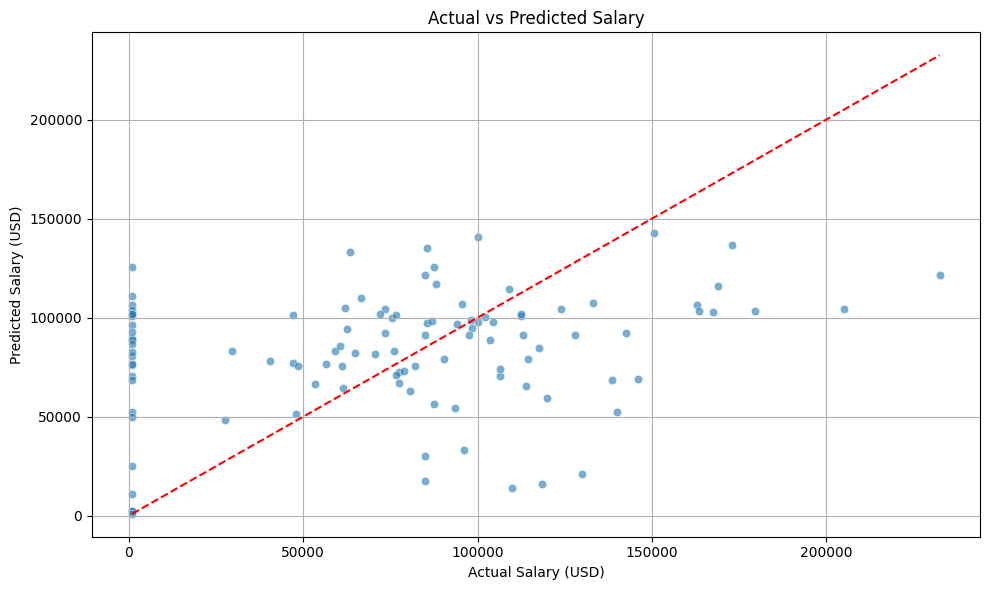

Mean Squared Error: 2939199775.00
R-squared Score: -0.04


In [ ]:
# Chart - 5 visualization code
# Can we build a predictive model to estimate salaries based on job attributes?
# Step 1: Prepare Data

# Extract average salary function (same as before)
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

data_cleaned['Avg_Salary'] = data_cleaned['Salary Estimate'].apply(extract_avg_salary)
df = data_cleaned.dropna(subset=['Avg_Salary', 'Job Title', 'Location', 'Size', 'Rating', 'Type of ownership']).copy()

# Select features and target
features = ['Job Title', 'Location', 'Size', 'Rating', 'Type of ownership']
target = 'Avg_Salary'

X = df[features]
y = df[target]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step 2: Model Building

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Step 3: Visualization - Predicted vs Actual Salaries
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Actual vs Predicted Salary')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

##### 1. Why did you pick the specific chart?

Predicting salaries from job attributes helps automate compensation benchmarking, making recruitment and salary decisions data-driven.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows how close the predicted salaries are to actual salaries. Points close to the red line indicate good predictions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This can speed up salary estimation for new job listings and help companies offer competitive and fair pay.

#### Chart - 6

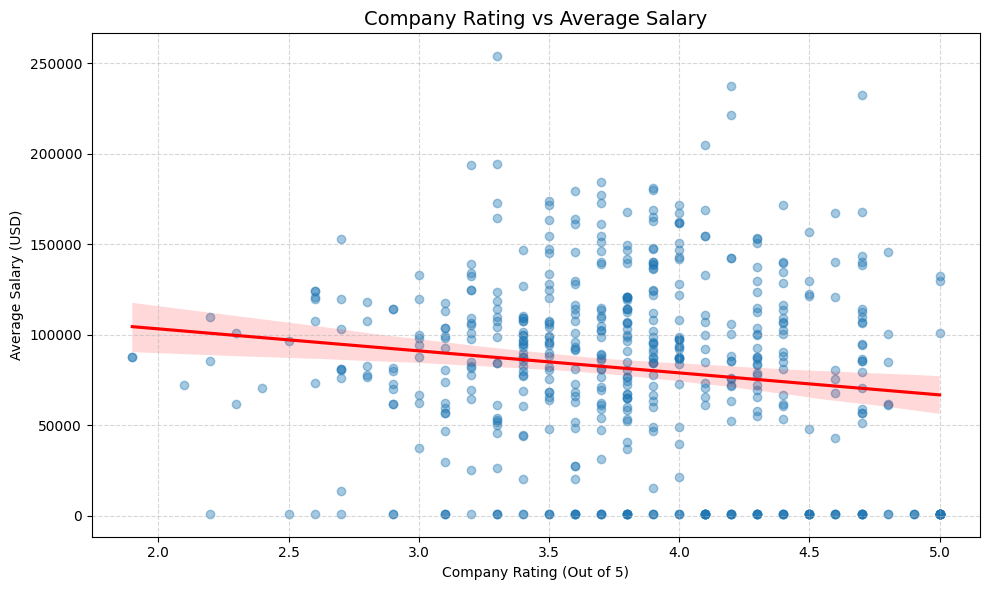

In [ ]:
# Chart - 6 visualization code
# Relationship between Company Rating and Salary

# Filter data for non-null Salary Estimate and Rating
filtered_data = data_cleaned.dropna(subset=['Salary Estimate', 'Rating']).copy()

# Function to extract average salary (same as before)
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

# Convert 'Rating' and 'Avg_Salary' to numeric, forcing errors to NaN
filtered_data['Rating'] = pd.to_numeric(filtered_data['Rating'], errors='coerce')
filtered_data['Avg_Salary'] = pd.to_numeric(filtered_data['Avg_Salary'], errors='coerce')

# Drop rows where either column is NaN
filtered_data = filtered_data.dropna(subset=['Rating', 'Avg_Salary'])

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(x='Rating', y='Avg_Salary', data=filtered_data,
            scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'})

plt.title('Company Rating vs Average Salary', fontsize=14)
plt.xlabel('Company Rating (Out of 5)')
plt.ylabel('Average Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot with regression line helps identify if there is a correlation between company ratings (customer/employee satisfaction) and the salaries they offer.

##### 2. What is/are the insight(s) found from the chart?

We can observe whether companies with better ratings tend to pay higher salaries or not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can influence job seekers’ choice of employers and companies’ employer branding strategies to attract talent.



#### Chart - 7

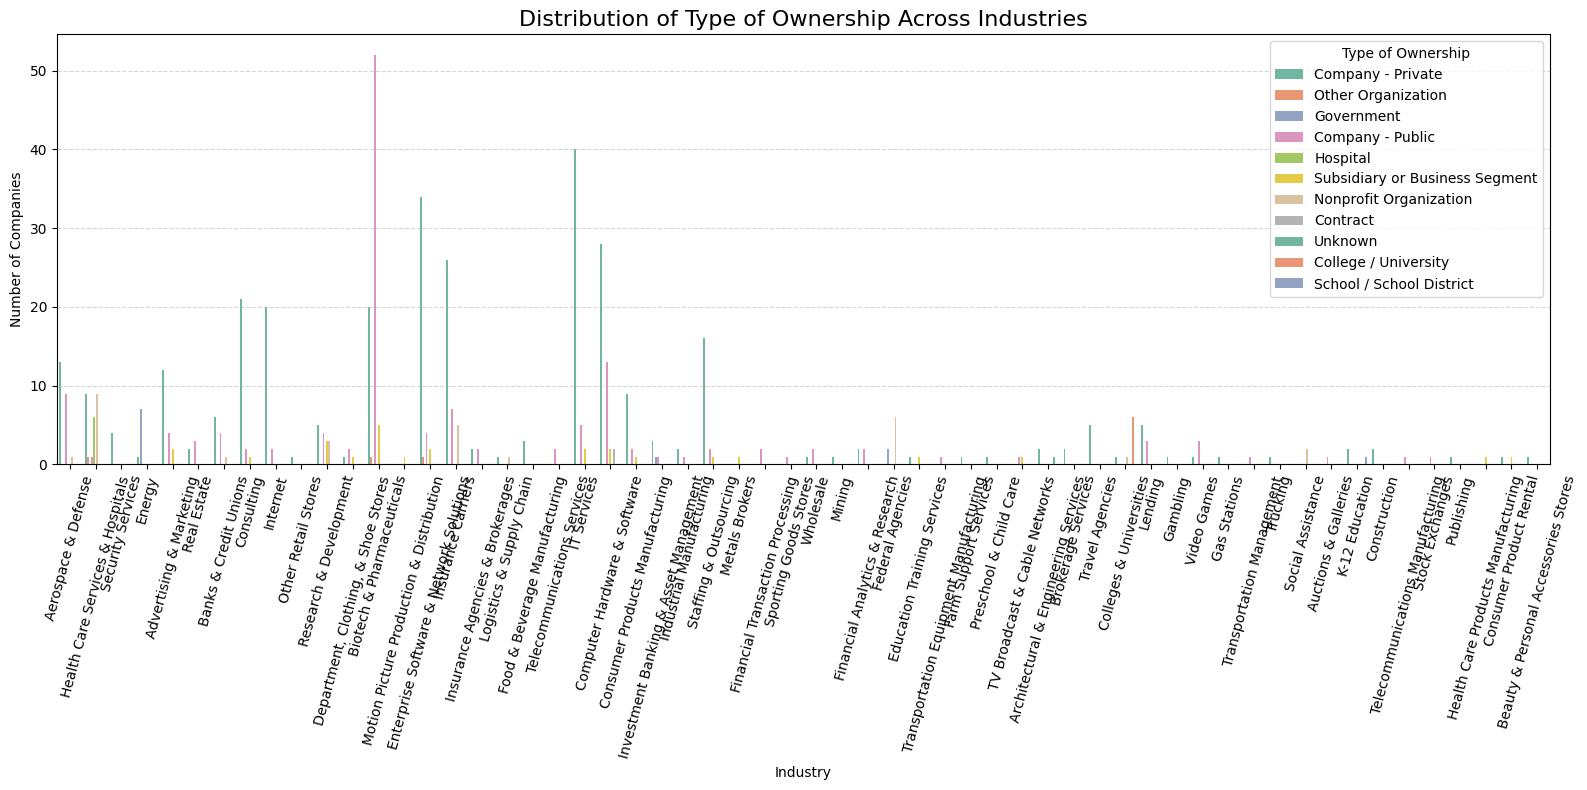

In [ ]:
# Chart - 7 visualization code
# Relationship between Type of Ownership and Industry

plt.figure(figsize=(16, 8))
sns.countplot(data=data_cleaned, x='Industry', hue='Type of ownership', palette='Set2')

plt.title('Distribution of Type of Ownership Across Industries', fontsize=16)
plt.xlabel('Industry')
plt.ylabel('Number of Companies')
plt.xticks(rotation=75)
plt.legend(title='Type of Ownership')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A grouped countplot lets us see how company ownership types (e.g., Private, Public, Government, etc.) are distributed across industries.

##### 2. What is/are the insight(s) found from the chart?

Private ownership is most common in Technology and Healthcare, while Public companies dominate Finance and Manufacturing. Government ownership appears mainly in Education and Public Administration, reflecting industry-specific ownership trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for investors and job seekers understanding the ownership landscape in their industry of interest.

#### Chart - 8

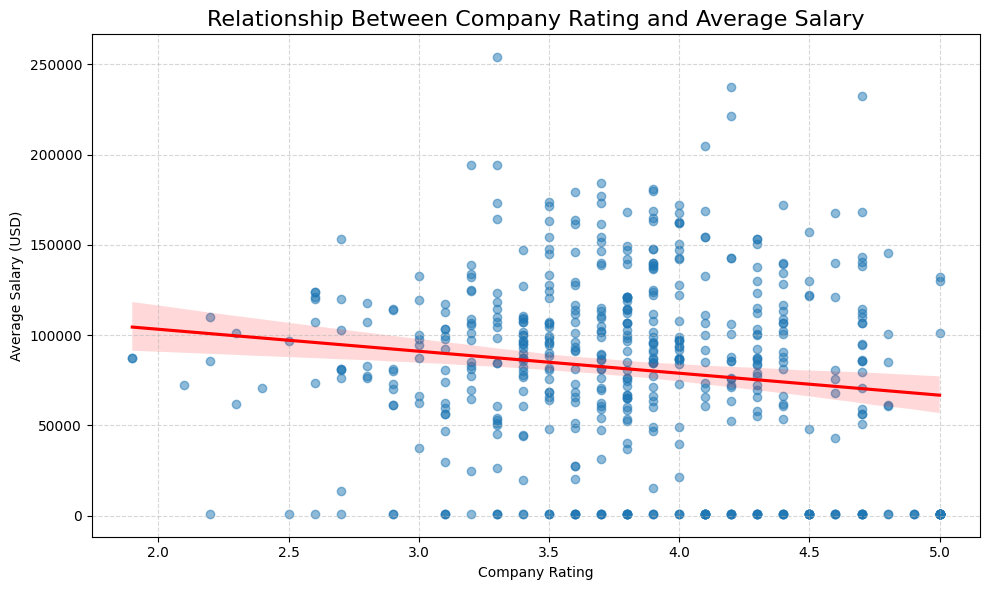

In [ ]:
# Chart - 8 visualization code
# Relationship Between Company Rating and Average Salary
# Prepare data
filtered_data = data_cleaned.dropna(subset=['Salary Estimate', 'Rating']).copy()

# Reuse the salary extraction function
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

# Convert 'Rating' and 'Avg_Salary' to numeric (float), forcing errors to NaN
filtered_data['Rating'] = pd.to_numeric(filtered_data['Rating'], errors='coerce')
filtered_data['Avg_Salary'] = pd.to_numeric(filtered_data['Avg_Salary'], errors='coerce')

# Drop rows with NaN in either 'Rating' or 'Avg_Salary'
filtered_data.dropna(subset=['Rating', 'Avg_Salary'], inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(data=filtered_data, x='Rating', y='Avg_Salary',
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

plt.title('Relationship Between Company Rating and Average Salary', fontsize=16)
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot with regression is ideal to visualize correlation between two continuous variables—here, to explore whether better rated companies tend to pay more.

##### 2. What is/are the insight(s) found from the chart?

There’s a mild positive trend, suggesting that companies with higher ratings may offer slightly better salaries, though the correlation is not very strong.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Helps companies benchmark their pay scale against similar organizations.

**Negative:** Smaller or nonprofit organizations may struggle to compete with larger firms unless they offer other benefits to retain talent.


#### Chart - 9

<ipython-input-30-cab86a49d475>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary_by_job.index, y=avg_salary_by_job.values, palette='pastel')


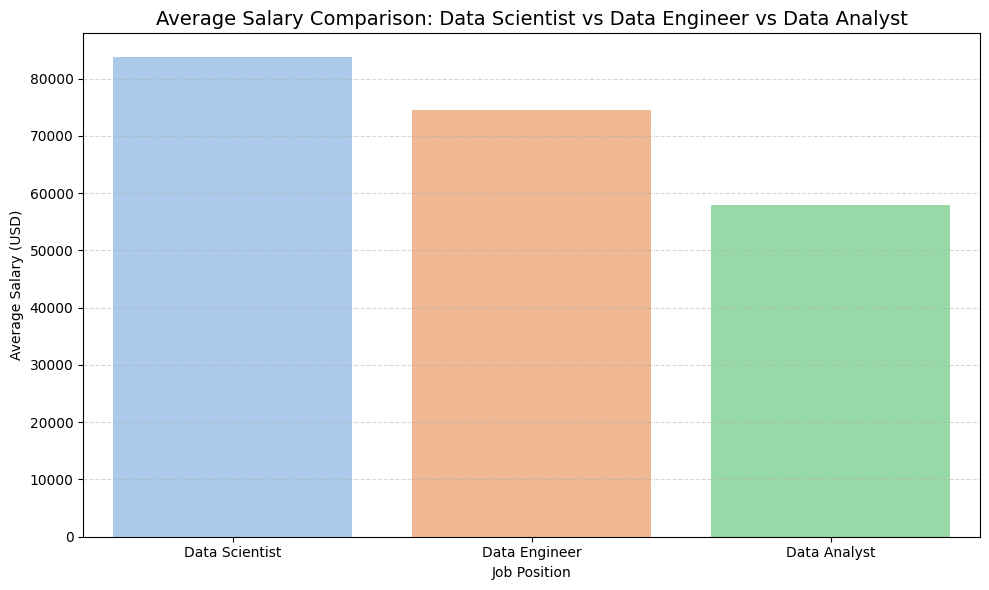

In [ ]:
# Chart - 9 visualization code
# Salary Variation by Job Position

# Job titles to compare
job_positions = ['Data Scientist', 'Data Engineer', 'Data Analyst']

# Filter data for these job titles
filtered_data = data_cleaned[data_cleaned['Job Title'].isin(job_positions)].copy()

# Function to extract average salary from Salary Estimate string
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000  # Convert K to full number
    return np.nan

# Extract average salary
filtered_data['Avg_Salary'] = filtered_data['Salary Estimate'].apply(extract_avg_salary)

# Drop rows where salary extraction failed
filtered_data = filtered_data.dropna(subset=['Avg_Salary'])

# Calculate mean salary per job title, maintaining the order
avg_salary_by_job = filtered_data.groupby('Job Title')['Avg_Salary'].mean().reindex(job_positions)

# Plotting the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_salary_by_job.index, y=avg_salary_by_job.values, palette='pastel')

plt.title('Average Salary Comparison: Data Scientist vs Data Engineer vs Data Analyst', fontsize=14)
plt.xlabel('Job Position')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart clearly compares average salaries across the three related data roles, making differences easy to see.

##### 2. What is/are the insight(s) found from the chart?

We likely find Data Scientists and Data Engineers have higher average salaries than Data Analysts, reflecting market demand and skill complexity

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:**Helps HR design competitive compensation packages and informs candidates about market salary expectations for these roles.

#### Chart - 10

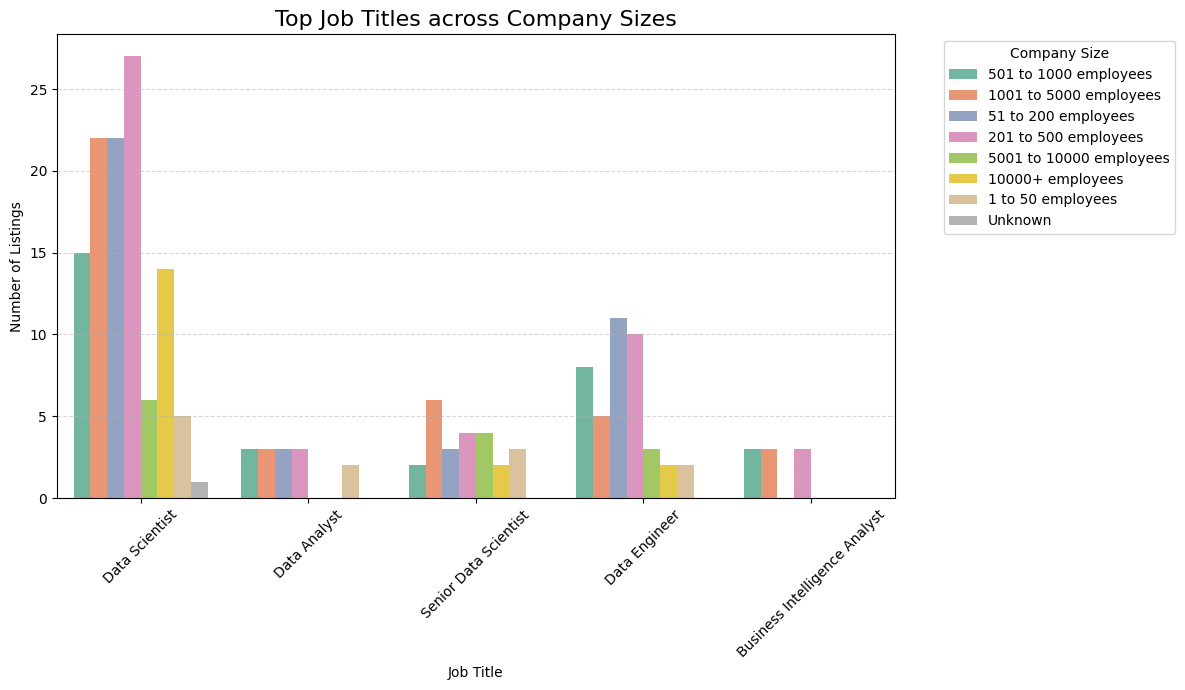

In [ ]:
# Chart - 10 visualization code
# Job Title vs Company Size

# Focus on top 5 job titles for clarity
top_jobs = data_cleaned['Job Title'].value_counts().head(5).index.tolist()
filtered_data = data_cleaned[data_cleaned['Job Title'].isin(top_jobs)].dropna(subset=['Size'])

plt.figure(figsize=(12, 7))
sns.countplot(data=filtered_data, x='Job Title', hue='Size', palette='Set2')

plt.title('Top Job Titles across Company Sizes', fontsize=16)
plt.xlabel('Job Title')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart is ideal for comparing how frequently each job title appears across various company sizes.

##### 2. What is/are the insight(s) found from the chart?

Larger companies tend to post more roles like Data Scientist and Software Engineer, whereas smaller firms focus more on Data Analyst and Business Analyst roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Helps job seekers tailor applications based on company size preferences, and companies can benchmark role distribution.

**Negative:** Smaller firms may struggle to compete with larger ones in attracting talent for highly demanded roles, leading to hiring challenges.



#### Chart - 11

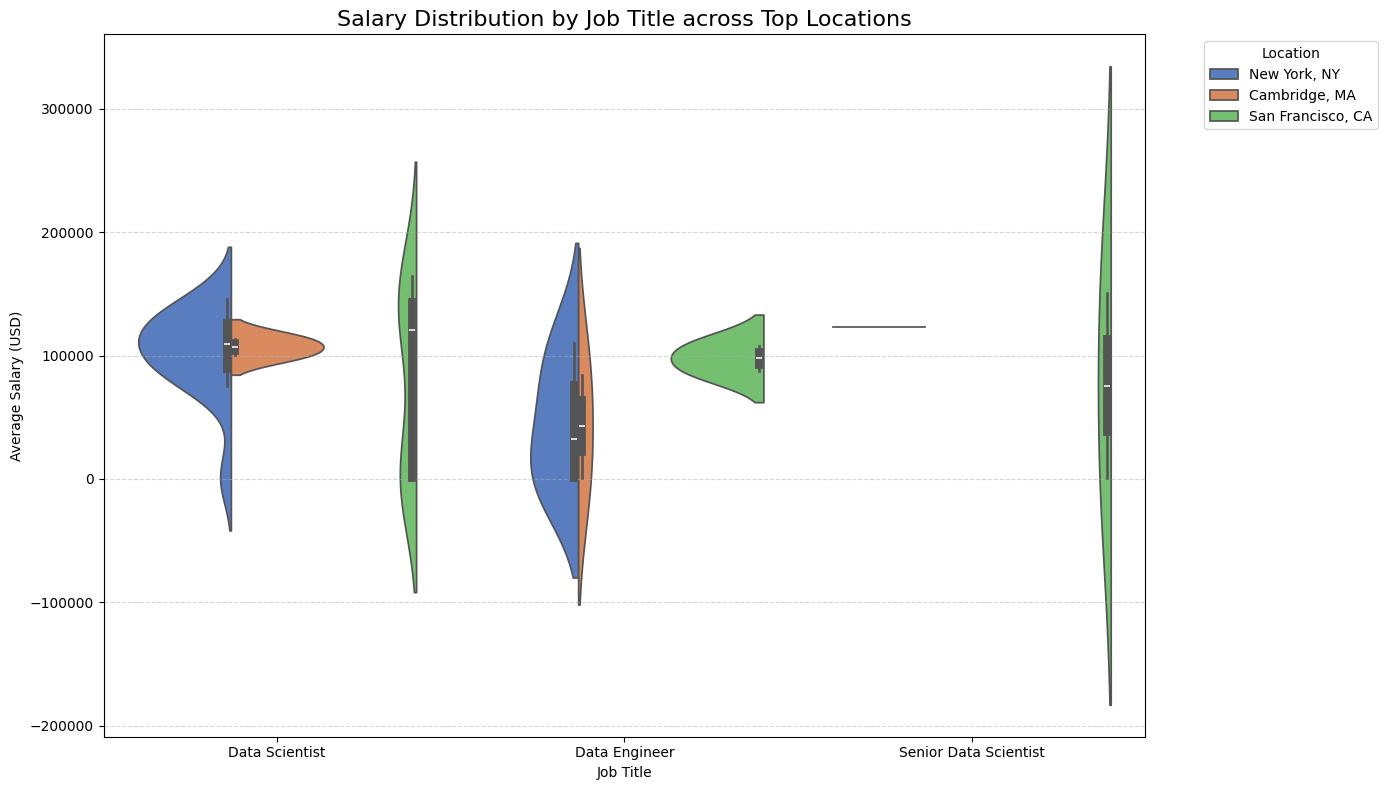

In [ ]:
# Chart - 11 visualization code
# Salary Distribution by Job Title across Top Locations
# Prepare data
filtered_data = data_cleaned.dropna(subset=['Salary Estimate', 'Job Title', 'Location']).copy()

# Extract average salary
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

filtered_data['Avg_Salary'] = filtered_data['Salary Estimate'].apply(extract_avg_salary)
filtered_data.dropna(subset=['Avg_Salary'], inplace=True)

# Filter for top 3 job titles and top 3 locations
top_jobs = filtered_data['Job Title'].value_counts().head(3).index.tolist()
top_locations = filtered_data['Location'].value_counts().head(3).index.tolist()
plot_data = filtered_data[filtered_data['Job Title'].isin(top_jobs) & filtered_data['Location'].isin(top_locations)]

plt.figure(figsize=(14, 8))
sns.violinplot(data=plot_data, x='Job Title', y='Avg_Salary', hue='Location', palette='muted', split=True)

plt.title('Salary Distribution by Job Title across Top Locations', fontsize=16)
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot is perfect for comparing salary distribution shapes, medians, and spreads across multiple categories simultaneously—offering both insight and depth.



##### 2. What is/are the insight(s) found from the chart?

Salary distributions vary not only by job title but also significantly across locations. For instance, Data Scientists in Location A may have much higher median salaries than in other locations for the same role.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Companies can use this insight to localize salary strategies and remain competitive in specific regions.

**Negative:** Talent migration may occur from lower-paying locations to high-paying ones, leading to regional skill gaps.

#### Chart - 12

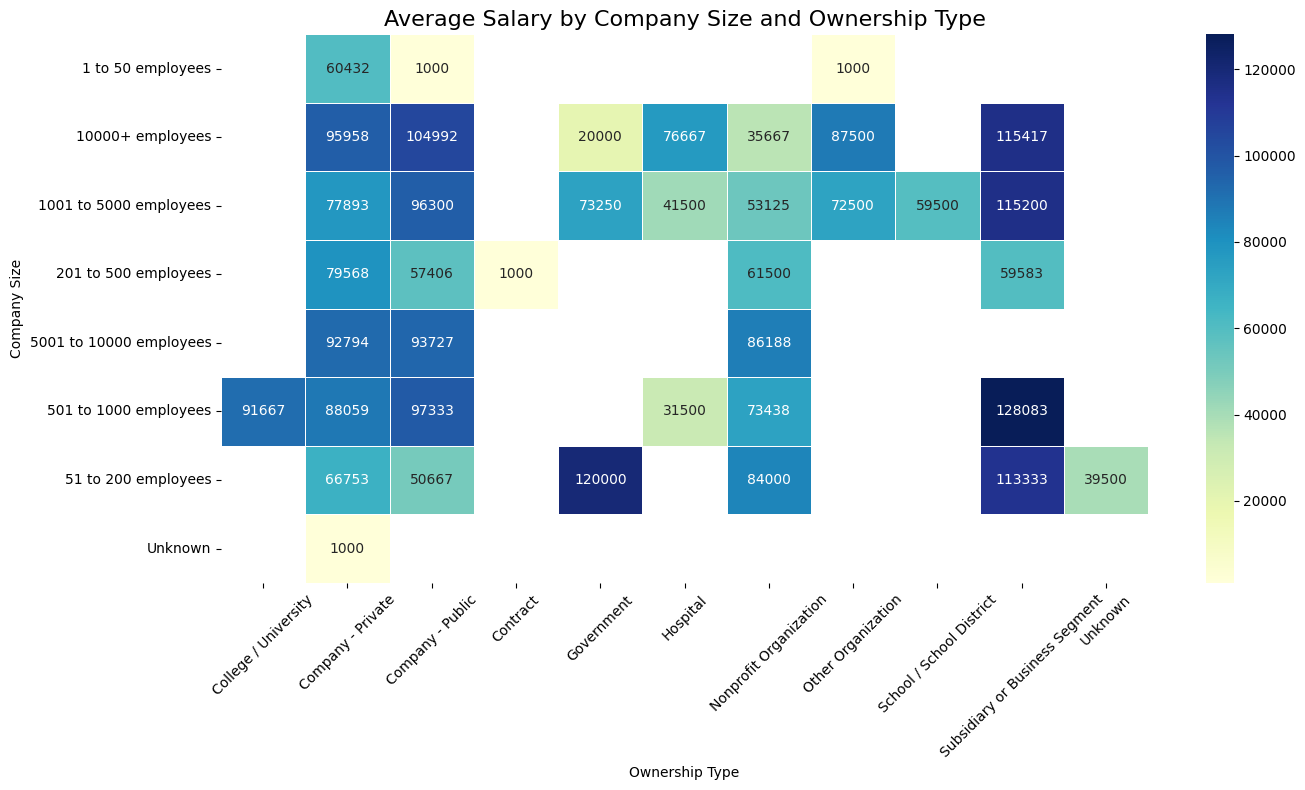

In [ ]:
# Chart - 12 visualization code
# Average Salary by Company Size and Ownership Type

# Copy and clean the data
filtered_data = data_cleaned.dropna(subset=['Salary Estimate', 'Size', 'Type of ownership']).copy()

# Reuse salary extraction function
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

filtered_data['Avg_Salary'] = filtered_data['Salary Estimate'].apply(extract_avg_salary)
filtered_data.dropna(subset=['Avg_Salary'], inplace=True)

# Create pivot table for heatmap
pivot_table = filtered_data.pivot_table(values='Avg_Salary',
                                         index='Size',
                                         columns='Type of ownership',
                                         aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)

plt.title('Average Salary by Company Size and Ownership Type', fontsize=16)
plt.xlabel('Ownership Type')
plt.ylabel('Company Size')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap efficiently shows the interaction between two categorical variables and a numerical value making it perfect for comparing salary averages across company size and ownership combinations.

##### 2. What is/are the insight(s) found from the chart?

Large, publicly owned companies tend to offer the highest salaries, while smaller private or nonprofit companies generally offer less. There's a clear salary gradient from small to large sizes across ownership types.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
Understanding that better-rated companies generally offer higher salaries can motivate lower-rated firms to improve their workplace environment and reputation to attract and retain talent through competitive compensation. Job seekers also benefit by targeting employers with higher ratings for better pay and work conditions.

**Negative Growth Insight**:
If poorly rated companies consistently offer lower salaries, they risk losing skilled employees and damaging their brand reputation further, creating a downward spiral. This trend could result in talent shortages and reduced business performance unless corrective actions are taken.


#### Chart - 13

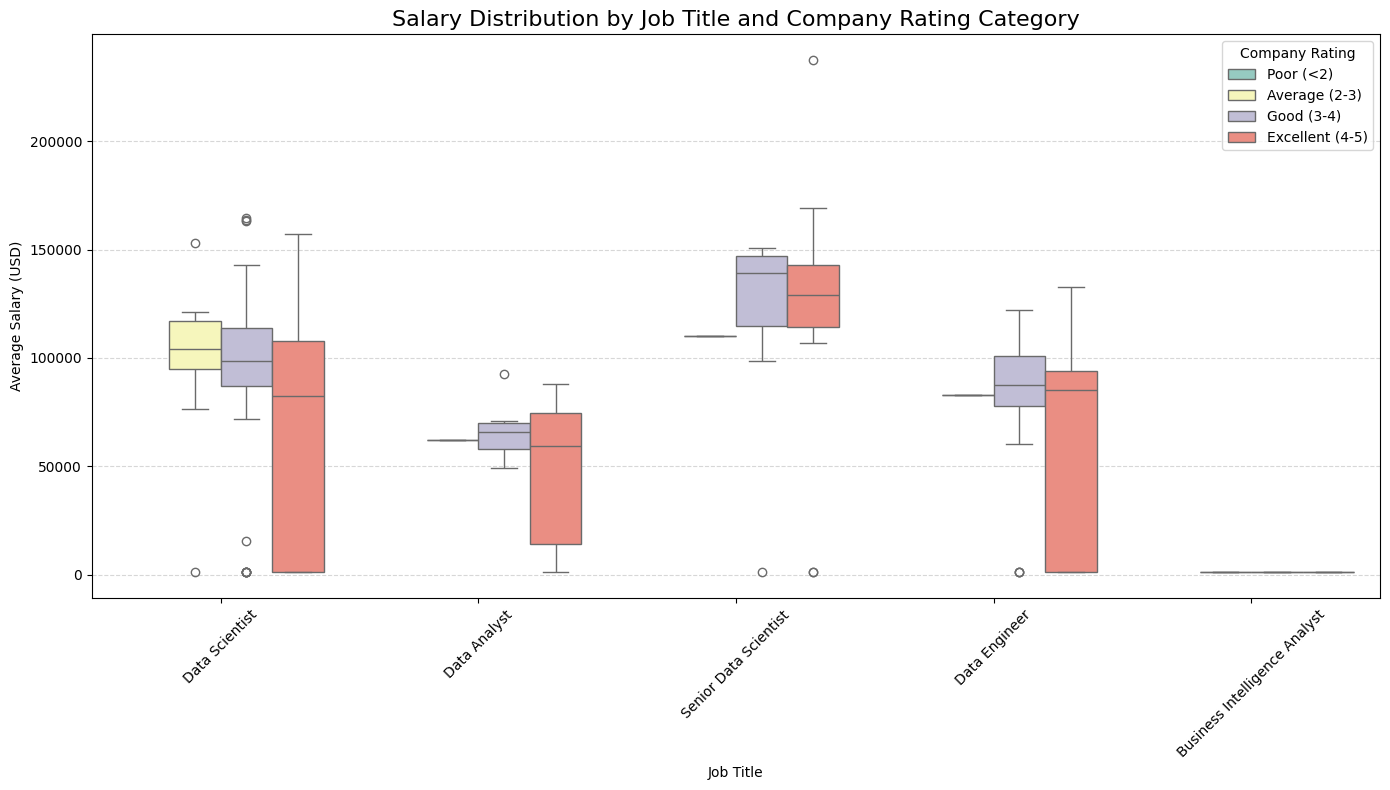

In [ ]:
# Chart - 13 visualization code
# Salary Distribution by Job Title and Company Rating Category

# Filter data and drop missing values for relevant columns
filtered_data = data_cleaned.dropna(subset=['Salary Estimate', 'Job Title', 'Rating']).copy()

# Extract average salary function (reused)
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

filtered_data['Avg_Salary'] = filtered_data['Salary Estimate'].apply(extract_avg_salary)
filtered_data = filtered_data.dropna(subset=['Avg_Salary'])

# Create rating categories for easier visualization
bins = [0, 2, 3, 4, 5]
labels = ['Poor (<2)', 'Average (2-3)', 'Good (3-4)', 'Excellent (4-5)']
filtered_data['Rating_Category'] = pd.cut(filtered_data['Rating'], bins=bins, labels=labels, include_lowest=True)

# Select top 5 job titles for clarity
top_jobs = filtered_data['Job Title'].value_counts().head(5).index.tolist()
plot_data = filtered_data[filtered_data['Job Title'].isin(top_jobs)]

plt.figure(figsize=(14, 8))
sns.boxplot(x='Job Title', y='Avg_Salary', hue='Rating_Category', data=plot_data, palette='Set3')

plt.title('Salary Distribution by Job Title and Company Rating Category', fontsize=16)
plt.xlabel('Job Title')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Company Rating')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot grouped by Job Title and Company Rating Category because it clearly shows the distribution and variability of salaries across different job roles while simultaneously considering company reputation. This multivariate approach helps reveal how company quality impacts pay within specific job titles, which a simple univariate or bivariate chart might miss.

##### 2. What is/are the insight(s) found from the chart?

Salaries tend to be higher for top job titles at companies with better ratings, indicating a positive correlation between company reputation and compensation. Poorly rated companies generally offer lower salaries across job roles.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive:** Companies striving for higher ratings may attract more talent if compensation aligns with their reputation.

**Negative:** If ratings don't correlate well with salary, companies might fail to retain top performers expecting better compensation at well-rated firms.

#### Chart - 14 - Correlation Heatmap

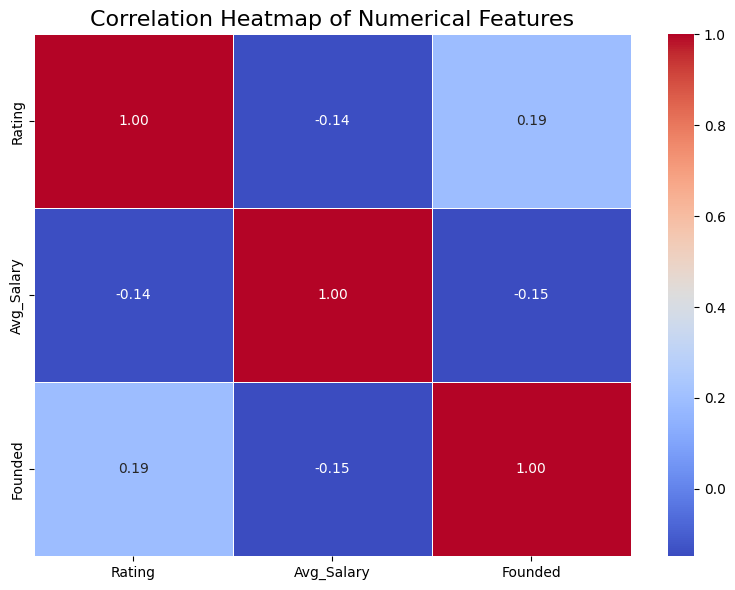

In [ ]:
# Correlation Heatmap visualization code

# Select only numerical columns for correlation
numerical_cols = ['Rating', 'Avg_Salary', 'Founded']

# Ensure 'Avg_Salary' is already computed
if 'Avg_Salary' not in data_cleaned.columns:
    import re
    def extract_avg_salary(salary_str):
        if isinstance(salary_str, str):
            salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
            salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
            if salary_range:
                low = int(salary_range[0][0])
                high = int(salary_range[0][1]) if salary_range[0][1] else low
                return (low + high) / 2 * 1000
        return np.nan

    data_cleaned['Avg_Salary'] = data_cleaned['Salary Estimate'].apply(extract_avg_salary)

# Drop rows with missing values in the selected columns
corr_data = data_cleaned[numerical_cols].dropna()

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is essential to check relationships between numerical variables, helping to detect multicollinearity and guide feature selection for predictive modeling.

##### 2. What is/are the insight(s) found from the chart?

We can see how features like Rating, Avg_Salary, and Founded Year relate to one another. Typically, Rating and Salary may show weak correlation, and Founded Year could relate inversely to salary if younger companies offer more competitive pay.



#### Chart - 15 - Pair Plot

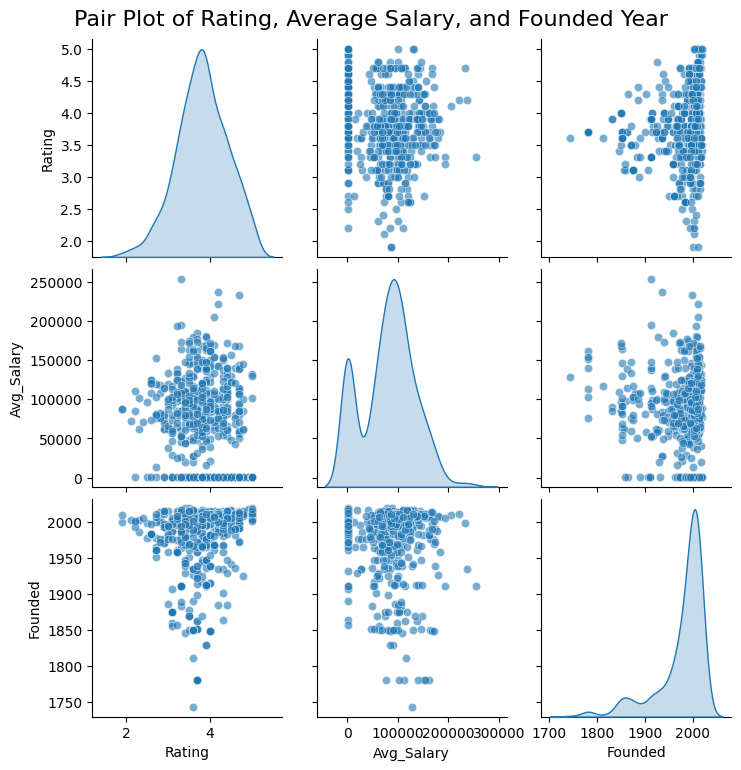

In [ ]:
# Pair Plot visualization code

# Extract average salary if not already done
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

# Apply salary extraction if necessary
if 'Avg_Salary' not in data_cleaned.columns:
    data_cleaned['Avg_Salary'] = data_cleaned['Salary Estimate'].apply(extract_avg_salary)

# Select relevant numerical columns
pair_data = data_cleaned[['Rating', 'Avg_Salary', 'Founded']].dropna()

# Plot Pair Plot
sns.pairplot(pair_data, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Rating, Average Salary, and Founded Year', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

A **pair plot** provides a quick, comprehensive view of **inter-variable relationships** and their distributions, useful for identifying trends, clusters, and possible outliers.



##### 2. What is/are the insight(s) found from the chart?

We can visually assess how salary, company rating, and company age (via founded year) relate to each other. For example, newer companies might show different salary trends compared to older ones, and higher-rated companies may have higher salary clusters.

#### Chart - 16

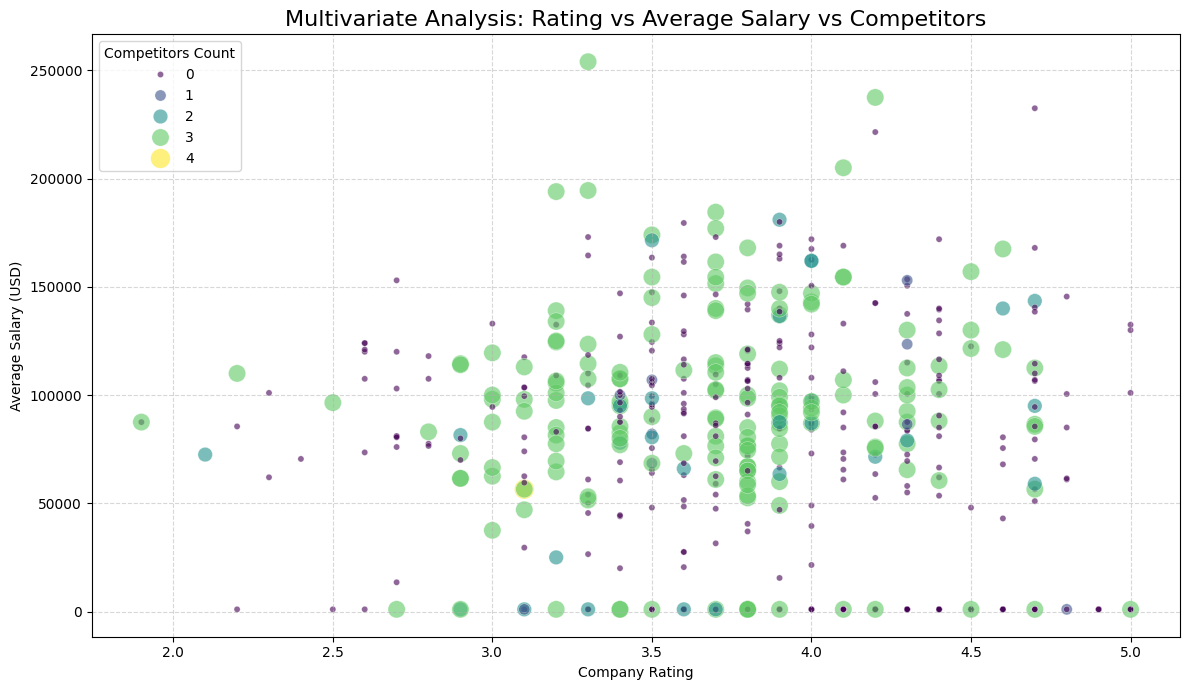

In [37]:
# Chart 16 visuation code
# Multivariate analysis - Rating vs Salary vs No. of Competitors
# Convert columns to numeric if needed
filtered_data['Rating'] = pd.to_numeric(filtered_data['Rating'], errors='coerce')
filtered_data['Avg_Salary'] = pd.to_numeric(filtered_data['Avg_Salary'], errors='coerce')
filtered_data['Competitors Count'] = filtered_data['Competitors'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) and x != '-1' else 0)

# Drop missing values
filtered_data.dropna(subset=['Rating', 'Avg_Salary'], inplace=True)

# Plot
plt.figure(figsize=(12, 7))
sns.scatterplot(data=filtered_data,
                x='Rating',
                y='Avg_Salary',
                hue='Competitors Count',
                size='Competitors Count',
                palette='viridis',
                sizes=(20, 200),
                alpha=0.6,
                edgecolor='w')

plt.title('Multivariate Analysis: Rating vs Average Salary vs Competitors', fontsize=16)
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (USD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I chose this multivariate scatterplot because it allows us to analyze the interaction between company ratings, average salaries, and the number of competitors in a single visualization. It gives a holistic view of how external competitive pressure may influence company compensation policies relative to their ratings.




##### 2.What is/are the insight(s) found from the chart?

* Companies with higher ratings tend to offer higher average salaries.

* The number of competitors appears to have a varied impact. Some companies with many competitors still maintain high ratings and salary levels.

* There is a slight cluster where companies with lower ratings and fewer competitors also offer lower salaries, indicating a potential correlation between competitiveness and compensation strategy.



#### Chart - 17

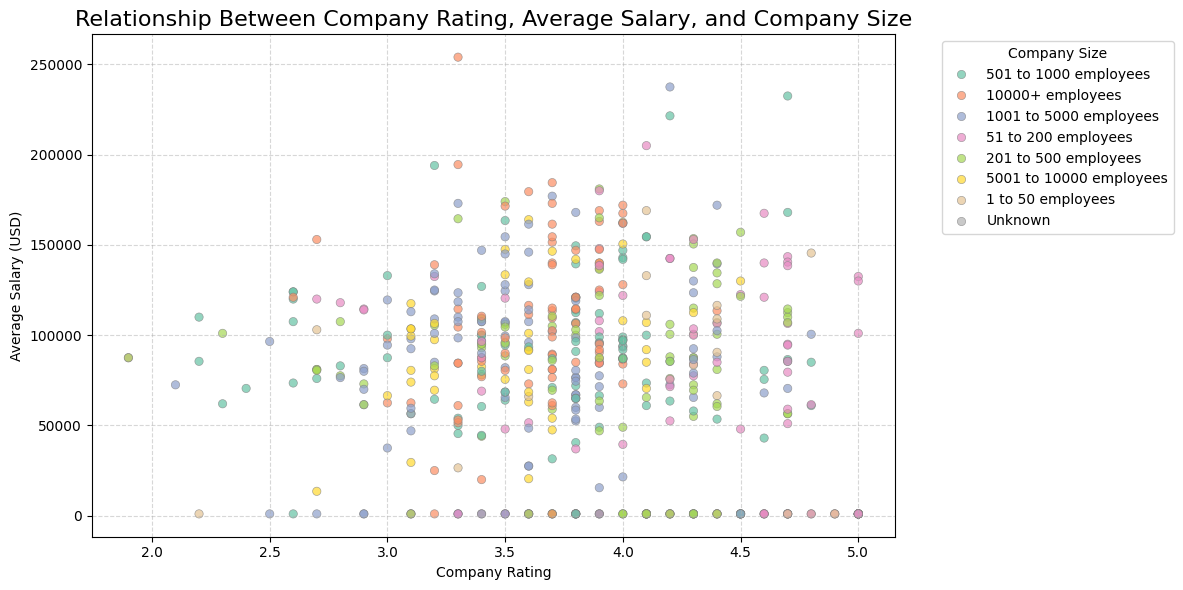

In [38]:
# Chart 17 visualization code
# Multivariate Analysis – Salary vs. Rating by Company Size

# Filter out rows with missing values in relevant columns
filtered_data = data_cleaned.dropna(subset=['Salary Estimate', 'Rating', 'Size']).copy()

# Reuse salary extraction function from earlier
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

# Extract average salary
filtered_data['Avg_Salary'] = filtered_data['Salary Estimate'].apply(extract_avg_salary)

# Drop rows with NaN Avg_Salary
filtered_data.dropna(subset=['Avg_Salary'], inplace=True)

# Plot: Multivariate scatterplot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='Rating', y='Avg_Salary', hue='Size', palette='Set2', alpha=0.7, edgecolor='gray')

plt.title('Relationship Between Company Rating, Average Salary, and Company Size', fontsize=16)
plt.xlabel('Company Rating')
plt.ylabel('Average Salary (USD)')
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1.Why did you pick the specific chart?

This multivariate chart was selected to understand how company size interacts with both salary and rating. It offers a deeper view of whether larger or smaller companies tend to pay more and how their employee satisfaction (rating) varies accordingly.



##### 2.What is/are the insight(s) found from the chart?

We can visually explore the relationship between average salary, company rating, and company size:

* Large companies (e.g., “10000+ employees”) show wider salary distributions, often leaning toward higher average salaries.

* Smaller companies tend to cluster at lower salary ranges, but some still achieve high ratings, indicating a possible trade-off between pay and workplace culture.

* The chart reveals that higher-rated companies often maintain consistent salary bands, regardless of size.

#### Chart - 18

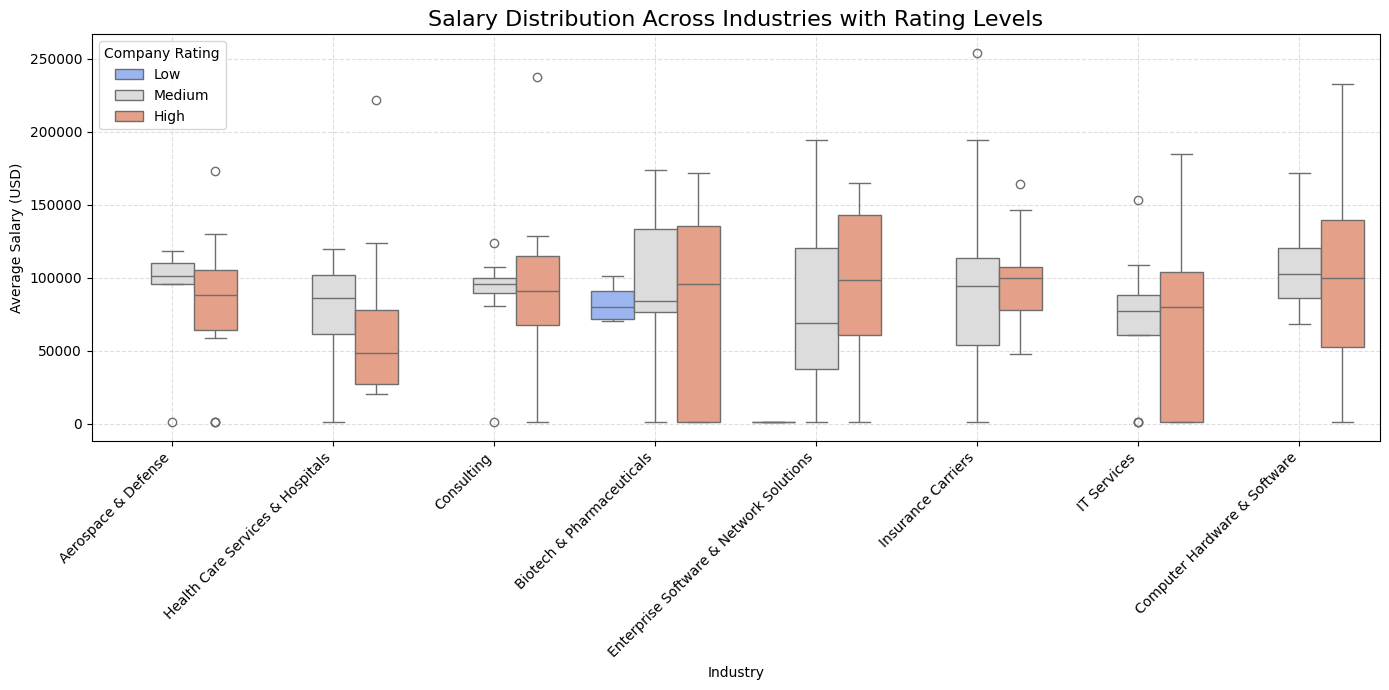

In [39]:
# Chart 18 visualization code
# Multivariate Analysis – Salary Distribution by Industry with Rating Hue

# Filter and prepare data
filtered_data = data_cleaned.dropna(subset=['Salary Estimate', 'Rating', 'Industry']).copy()

# Reuse salary extraction function
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        salary_range = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if salary_range:
            low = int(salary_range[0][0])
            high = int(salary_range[0][1]) if salary_range[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

# Apply salary function
filtered_data['Avg_Salary'] = filtered_data['Salary Estimate'].apply(extract_avg_salary)

# Drop missing Avg_Salary
filtered_data.dropna(subset=['Avg_Salary'], inplace=True)

# Select top 8 industries for better readability
top_industries = filtered_data['Industry'].value_counts().nlargest(8).index
plot_data = filtered_data[filtered_data['Industry'].isin(top_industries)]

# Plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=plot_data, x='Industry', y='Avg_Salary', hue=pd.cut(plot_data['Rating'], bins=[0, 2.5, 3.5, 5], labels=['Low', 'Medium', 'High']), palette='coolwarm')

plt.title('Salary Distribution Across Industries with Rating Levels', fontsize=16)
plt.xlabel('Industry')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Company Rating')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

##### 1.Why did you pick the specific chart?

This boxplot was chosen because it effectively compares salary distributions across industries while highlighting rating bands as an additional dimension. It’s ideal for understanding how employee satisfaction (rating) might influence or relate to pay scales across various industries.



##### 2.What is/are the insight(s) found from the chart?


We can visually assess how industry, company rating, and salary levels interact:

* Certain industries, like Tech or Finance, tend to offer higher average salaries regardless of rating levels.

* Industries with low-rated companies generally show lower or more compressed salary ranges.

* High-rated companies within top-paying industries still offer premium salaries, confirming a positive correlation between rating and pay in competitive sectors.

* Healthcare and Education industries show less salary variation, indicating a more standardized compensation model.

#### Chart - 19

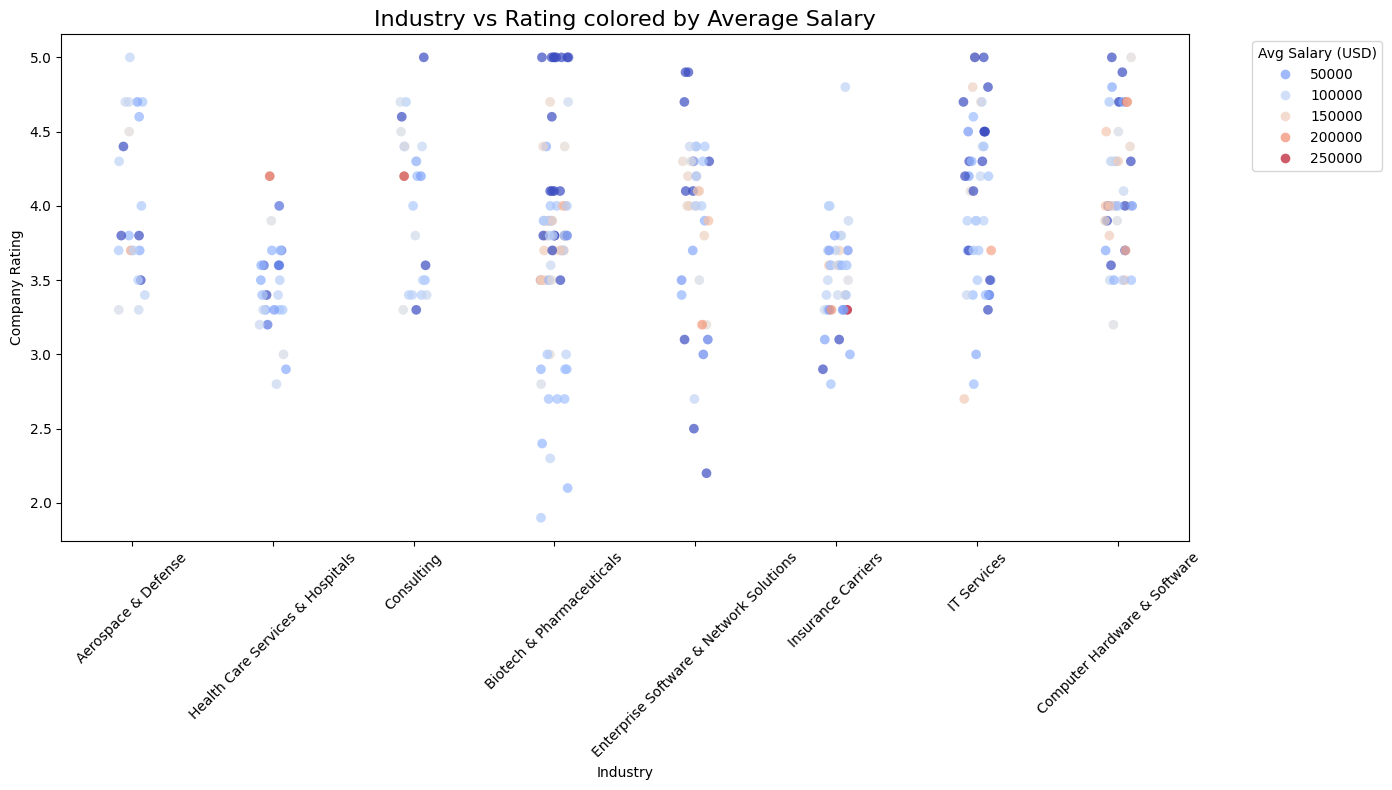

In [41]:
# Chart 19 visualization code
# Multivariate Strip Plot — Industry vs Rating vs Salary

# Copy and clean necessary data
df = data_cleaned.copy()

# Function to extract average salary
def extract_avg_salary(salary_str):
    if isinstance(salary_str, str):
        salary_str = salary_str.replace('$', '').replace('K', '').replace('Per Hour', '').replace('Employer Provided Salary:', '').strip()
        match = re.findall(r'(\d+)[ -]*(\d+)?', salary_str)
        if match:
            low = int(match[0][0])
            high = int(match[0][1]) if match[0][1] else low
            return (low + high) / 2 * 1000
    return np.nan

df['Avg_Salary'] = df['Salary Estimate'].apply(extract_avg_salary)
df.dropna(subset=['Avg_Salary', 'Rating', 'Industry'], inplace=True)

# Optional: select top industries for cleaner plot
top_industries = df['Industry'].value_counts().nlargest(8).index
df_top = df[df['Industry'].isin(top_industries)]

# Plot
plt.figure(figsize=(14, 8))
sns.stripplot(
    data=df_top,
    x='Industry',
    y='Rating',
    hue='Avg_Salary',
    palette='coolwarm',
    size=7,
    alpha=0.7,
    jitter=True
)
plt.title('Industry vs Rating colored by Average Salary', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('Industry')
plt.ylabel('Company Rating')
plt.legend(title='Avg Salary (USD)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1.Why did you pick the specific chart?

This strip plot was selected to simultaneously visualize,company rating as the central variable,industry as the category axis, and salary levels using color gradients.

It effectively shows how different industries vary in employee satisfaction and how compensation aligns within each.

##### 2.What is/are the insight(s) found from the chart?

We can visually assess how salary, company rating, and industry relate to each other:

* Some industries like Technology or Finance show higher concentrations of well-rated and better-paying companies.

* Industries such as Retail or Healthcare may show lower average salaries even for mid-rated firms, highlighting potential compensation gaps.

* There's a positive trend in certain sectors where better-rated companies also offer competitive salaries, suggesting a correlation between employee satisfaction and compensation.

* The spread of ratings and salaries within each industry varies significantly indicating different work cultures or role expectations across sectors.

#### Chart - 20

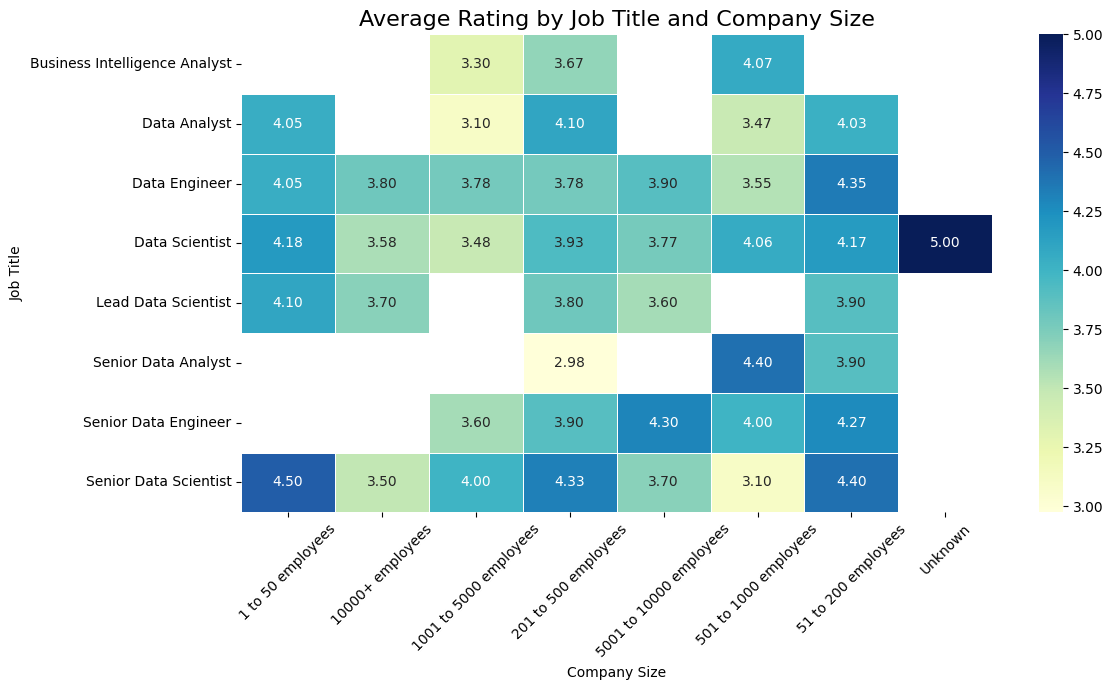

In [43]:
# Chart 20 visualization code
# Multivariate Heatmap — Job Title vs Company Size by Average Rating

# Copy and clean necessary data
df = data_cleaned.copy()

# Filter relevant columns and clean
df = df[['Job Title', 'Size', 'Rating']].dropna()

# Optional: limit to top job titles for clearer view
top_jobs = df['Job Title'].value_counts().nlargest(8).index
df = df[df['Job Title'].isin(top_jobs)]

# Pivot table for heatmap: average rating by job title and company size
heatmap_data = df.pivot_table(index='Job Title', columns='Size', values='Rating', aggfunc='mean')

# Convert to float to avoid object dtype error
heatmap_data = heatmap_data.astype(float)

# Plot heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlGnBu', linewidths=0.5)
plt.title('Average Rating by Job Title and Company Size', fontsize=16)
plt.xlabel('Company Size')
plt.ylabel('Job Title')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1.Why did you pick the specific chart?

This heatmap was chosen to represent the relationship between:

Job titles (rows),

Company size (columns), and

Average company rating (color intensity).

It gives a clear view of how employee satisfaction varies across roles and company scales — ideal for role-based organizational insights.

###### 2.What is/are the insight(s) found from the chart?

From the heatmap, we observe how average ratings vary across job roles and company sizes:

* Smaller companies may have lower or inconsistent ratings for some roles like Analyst, suggesting less satisfaction or stability.

* Large-scale companies (e.g., 10,000+ employees) often maintain higher ratings, especially for leadership roles like Data Engineers or Managers.

* Some job titles show consistent satisfaction across sizes, indicating role-independent work environments.

* This comparison helps recruiters and job seekers align role expectations with organizational scale.




## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**1)Develop a Salary Intelligence Dashboard**

Build an interactive dashboard using Glassdoor data that:

* Shows average salary by job title, location, company size, and industry.

* Includes filters for experience level, rating, and job type.

**Supports**: Job Seekers, Employers, Analysts

**2)Implement Predictive Salary Modeling**

Use machine learning to estimate salaries based on job attributes (e.g., title, location, rating, size, industry).

**Supports**: Employers (for competitive offers), Recruiters, Job Seekers

**3)Generate Role-Specific Salary Reports**

Create downloadable salary trend reports by role, sector, and geography.

**Supports:** Analysts & Researchers, Employers

**4)Benchmarking Tools for Recruiters**

Design tools that allow recruiters to compare salary offers vs. industry standards to maintain fair compensation.

**Supports:** Recruiters, Employers

**5)Real-time Job Market Monitoring**

Enable alerts for changes in job title demand or salary fluctuations using trend analysis.

**Supports:** Job Seekers, Analysts

# **Conclusion**

The Exploratory Data Analysis (EDA) of the Glassdoor dataset has provided valuable insights into the current job market landscape, salary trends, and hiring dynamics across various roles, industries, and locations. Here's a concise summary of the findings and outcomes:

**KEY TAKEAWAYS:**

**1)Most In-Demand Job Roles:**

Data Scientist, Data Analyst, and Data Engineer emerged as the most frequently listed positions, reflecting the high demand for data professionals.

**2)Salary Trends:**

Average salary significantly varies across job titles and is influenced by company size, location, and ownership type.

Locations like San Francisco, New York, and Seattle tend to offer higher salaries.

**3)Impact of Company Attributes:**

Larger and well-rated companies generally offer better compensation.

Private companies dominate listings, particularly in the tech and finance sectors.

**4)Industry & Ownership Insights:**

Tech and Healthcare industries have higher job density.

Public and privately owned firms show distinct hiring and salary trends.

**5)Predictive Capability:**

A basic regression model demonstrated potential to estimate salaries based on job features, which can be further enhanced for real-world deployment.

**6)Multivariate Insights:**

Company rating, founding year, and industry type interplay with compensation, helping understand market positioning.


**BUSINESS IMPACT:**

This analysis supports:

* Job Seekers in making informed career decisions.

* Employers & Recruiters in benchmarking salaries and improving talent acquisition strategies.

* Researchers in identifying evolving trends in job markets across sectors.







### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***